# **电商案例数据分析**

## **分析目标**

近年来电商行业高速发展，用户在线上进行下单购买后会留下一系列有价值的信息，通过对这些大量的信息进行分析，不仅可以得到用户的画像，也能各类产品在客群中的受欢迎程度，从而进一步制定营销策略以及配置各种货物的占比。

## **数据说明**

该数据来源于一个公开网站，数据内容为某礼品批发电商平台一年内的订单。  
以下是数据中各个变量名的解释：

- **InvoiceNo**: 发票号码，每笔交易分配唯一的6位整数。退货订单的代码以字母'c'开头

- **StockCode**: 产品代码，每个不同的产品分配唯一的5位整数

- **Description**: 产品描述

- **Quantity**: 每笔交易的每件产品数量

- **InvoiceDate**: 交易日期和时间

- **UnitPrice**: 单价（英镑）

- **CustomerID**:顾客ID

- **Country**: 客户所在国家/地区



## **导入并查看数据**




In [11]:
import pandas as pd
import numpy as np
df=pd.read_excel(r"C:\Users\24517\Desktop\ecommercedata-历史订单.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [15]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
162863,556876,22384,LUNCH BAG PINK POLKADOT,1,2011-06-15 11:56:00,1.65,16241,United Kingdom
348399,575989,21889,WOODEN BOX OF DOMINOES,3,2011-11-13 14:20:00,1.25,14698,United Kingdom
192081,560446,23297,SET 40 HEART SHAPE PETIT FOUR CASES,240,2011-07-19 09:10:00,1.45,14156,EIRE
350345,576176,85227,SET OF 6 3D KIT CARDS FOR KIDS,2,2011-11-14 11:04:00,0.85,16936,United Kingdom
66007,544903,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,2011-02-24 13:43:00,7.95,18065,United Kingdom
217066,563347,23106,ZINC HEARTS PLANT POT HOLDER,8,2011-08-15 13:46:00,2.89,16961,United Kingdom
233954,565317,23326,HANGING MINI COLOURED BOTTLES,48,2011-09-02 13:00:00,0.63,12921,United Kingdom
204331,561901,84378,SET OF 3 HEART COOKIE CUTTERS,288,2011-07-31 15:42:00,1.25,14156,EIRE
73468,545690,22413,METAL SIGN TAKE IT OR LEAVE IT,1,2011-03-06 12:46:00,2.95,13263,United Kingdom
660,536415,22834,HAND WARMER BABUSHKA DESIGN,3,2010-12-01 11:57:00,2.10,12838,United Kingdom


## **数据评估**

数据评估部分包括数据结构评估和数据内容评估两块。

### **数据结构评估**

主要检查数据是否符合每一行是单独的信息条，每一列是单独的变量列的要求。经过多次对数据的筛选查看，发现该数据并不存在数据结构方面的问题。

### **数据内容评估**

主要检查数据内容是否存在缺失值，重复值，不合理值以及不一致值。

#### **缺失值处理**


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389168 entries, 0 to 389167
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    389168 non-null  object        
 1   StockCode    389168 non-null  object        
 2   Description  389168 non-null  object        
 3   Quantity     389168 non-null  int64         
 4   InvoiceDate  389168 non-null  datetime64[ns]
 5   UnitPrice    389168 non-null  float64       
 6   CustomerID   389168 non-null  int64         
 7   Country      389168 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 23.8+ MB


通过上述结果发现数据内容并不存在缺失值。

#### **重复值处理**

检查数据中是否存在完全相同的数据，若存在，则直接删除。

In [46]:
df.duplicated().sum()

4946

In [60]:
df1=df.copy()
df1.drop_duplicates(inplace=True)

In [62]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
389163,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676,United Kingdom
389164,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676,United Kingdom
389165,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717,United Kingdom
389166,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717,United Kingdom


#### **不合理值处理**

检查数据中是否存在不合理的值。

In [72]:
df1['CustomerID']=df1.CustomerID.astype(object)
df1.describe()

,Quantity,InvoiceDate,UnitPrice
count,384222.000000,384222,384222.000000
mean,12.205545,2011-07-03 19:21:33.944750848,3.502443
min,-74215.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-01 11:34:00,1.250000
50%,5.000000,2011-07-20 12:58:00,1.950000
75%,12.000000,2011-10-12 09:37:15,3.750000
max,74215.000000,2011-11-30 17:42:00,38970.000000
std,176.786144,NaN,71.249977


由常理可知购买数量不应是负数，而上述的结果显示该数据中购买数量列是存在负数的，初步推断这里负数的意义可能是表示商品的退货，进一步做代码演示。

In [81]:
df1[(df1['InvoiceNo'].str[0]=='C') & (df1['Quantity']<0) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
389163,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676,United Kingdom
389164,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676,United Kingdom
389165,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717,United Kingdom
389166,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717,United Kingdom


由上述结果可得知当购买数量为负数时，发票号码都以C开头，所以当订单数量为负数时，表示退货。

除此之外，按照常理，货物单价也不应为0，进一步开展代码分析。

In [84]:
df1[df1['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7012,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
23071,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom
26046,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE
29881,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
29883,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom
35460,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107,United Kingdom
55279,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560,United Kingdom
87903,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
95201,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
99945,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410,United Kingdom


由上表可知当商品价格为0时，其他一切变量都属于正常取值，所以认为这些数据为无效数据，应当直接删除。

In [94]:
df1=df1[df1['UnitPrice']!=0]

#### **不一至值处理**

主要检查数据中是否存在不同的名称指代同一事物的情况。在本数据中主要检查国家列。

In [102]:
df1.Country.value_counts().sort_index()

Country
Australia                 1255
Austria                    394
Bahrain                     17
Belgium                   1971
Brazil                      32
Canada                     151
Channel Islands            751
Cyprus                     607
Czech Republic              30
Denmark                    378
EIRE                      7153
European Community          61
Finland                    681
France                    8135
Germany                   9138
Greece                     110
Iceland                    171
Israel                     247
Italy                      795
Japan                      350
Lebanon                     45
Lithuania                   35
Malta                      122
Netherlands               2281
Norway                    1012
Poland                     341
Portugal                  1369
RSA                         57
Saudi Arabia                10
Singapore                  229
Spain                     2456
Sweden                     459


由上述结果可知并不存在一个国家同时拥有多个代指名称的情况，因此不存在不一致性。

到此数据预处理部分已经完成，接下来开展可视化分析部分。

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

### **用户所在国家地区分布**

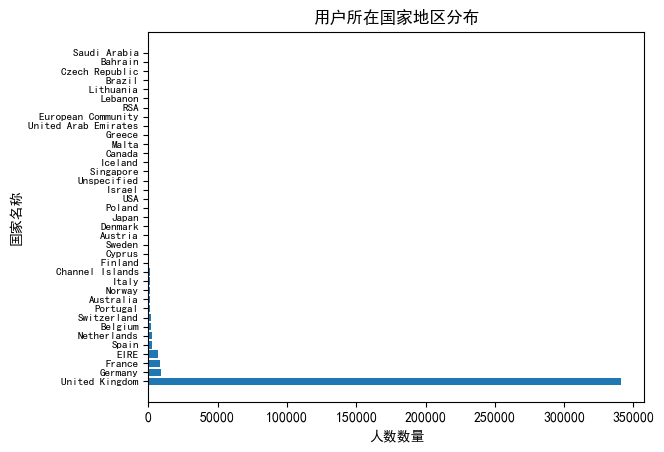

In [125]:
plt.barh(df1['Country'].value_counts().index,df1['Country'].value_counts())
plt.yticks(fontsize=8)
plt.xlabel('人数数量')
plt.ylabel('国家名称')
plt.title('用户所在国家地区分布')
plt.show()

由上图可知该店铺主要的顾客来源还是在英国，可能是因为店铺开在英国的原因，虽然来自其他国家的客户较少，但其在多个国家都有一定的销量，说明产品是符合客户需求的，客户量较少可能是因为店铺知名度的问题，因此可以适当增加国际营销，提升产品在国际的知名度以扩大销量。

### **不同产品的销售量对比**

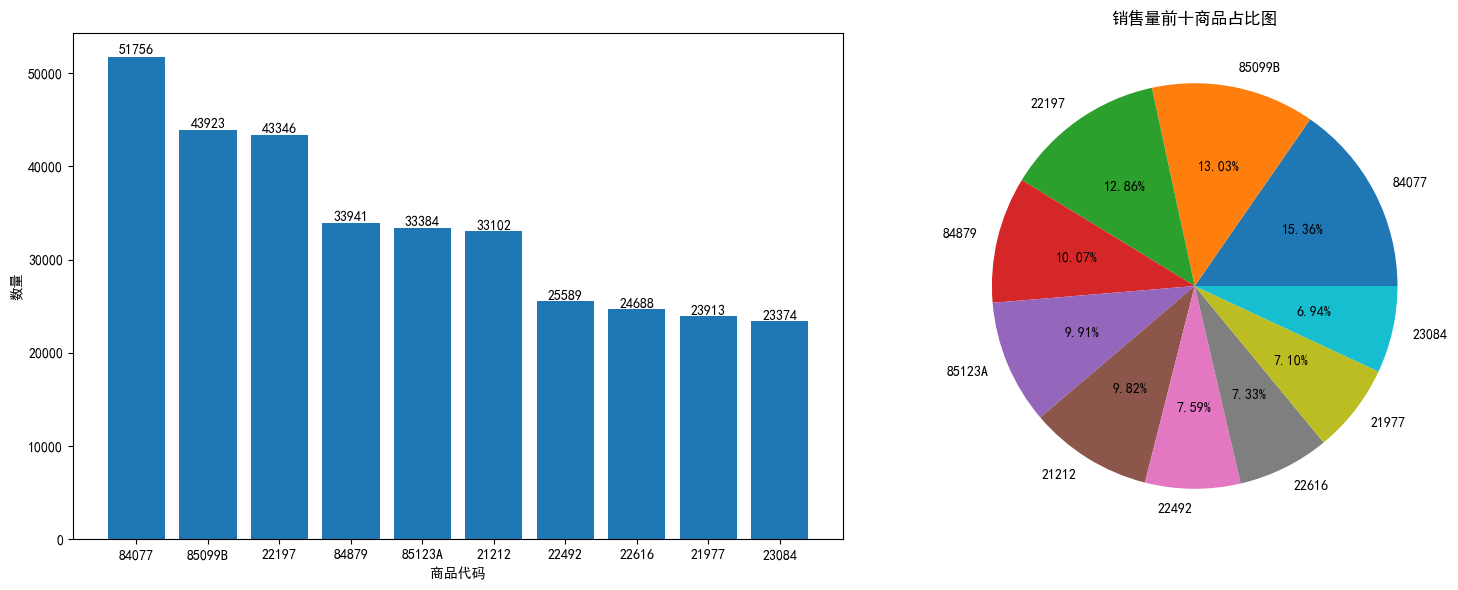

In [197]:
sales_info=df1.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
sales_info.head(10)
fig,axes=plt.subplots(1,2,figsize=(16,6))
ax1=axes[1]
ax1.pie(sales_info.head(10),labels=sales_info.head(10).index,autopct='%.2f%%')
ax1.set_title('销售量前十商品占比图')
ax2=axes[0]
bar=ax2.bar(sales_info.head(10).index.astype(str),sales_info.head(10))
ax2.set_xlabel('商品代码')
ax2.set_ylabel('数量')
for i in bar:
    ax2.text(i.get_x()+i.get_width()/2,i.get_height()*1.005,i.get_height(),ha='center')
plt.tight_layout()
plt.show()

由上述图表可知商品编码为84077的商品销量最好且销售数量是第十名的两倍，因此在后续销售过程中应尽可能多屯储该类商品并在销售过程中可以加入其他商品进行捆绑销售或者给出连续购买优惠以带动其他商品的销售额。

### **销量与月份之间的关系**

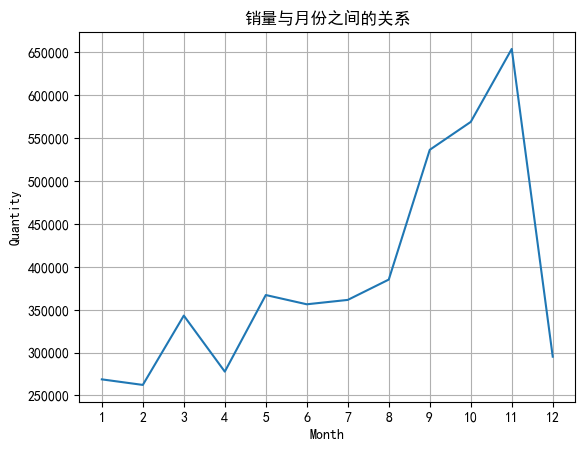

In [225]:
df1['Month']=df1['InvoiceDate'].dt.month
sales=df1.groupby('Month')['Quantity'].sum().sort_index()
sns.lineplot(sales)
plt.xticks(sales.index)
plt.grid()
plt.title('销量与月份之间的关系')
plt.show()

如上图所示，可得知销量最好的月份集中在九月，十月和十一月，因此在制定营销策略时，应着重重视这三个月的的营销，加大促销力度，进一步提升销量。

### **客户消费额的分布情况**

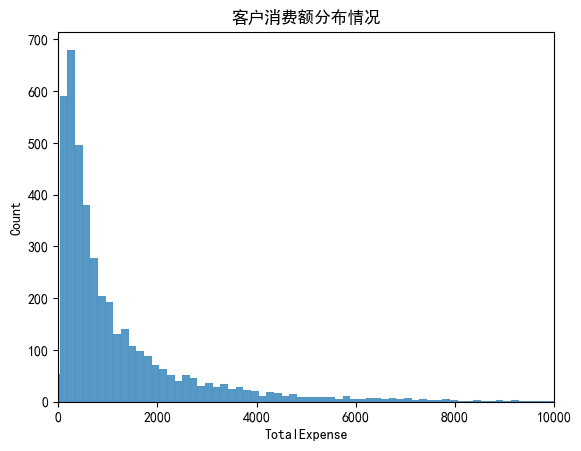

In [239]:
df1['TotalExpense']=df1['Quantity']*df1['UnitPrice']
expense_info=df1.groupby('CustomerID')['TotalExpense'].sum()
sns.histplot(expense_info)
plt.title('客户消费额分布情况')
plt.xlim(0,10000)
plt.show()

如上图所示可得知大部分客户的消费集中在2000英镑以内，因此在制定营销策略时应着重针对这类客户人群，因为该类人群时店铺的消费主力，应着重维护。